In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots
import squarify
plt.rcParams["font.sans-serif"]='Microsoft JhengHei'
titanic=sns.load_dataset("titanic")
df=pd.crosstab(titanic["class"],titanic["sex"])
df

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


In [6]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
titanic2=titanic
print(titanic2.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [9]:
print(titanic2['embarked'].value_counts())
print(titanic2['deck'].value_counts())
print(titanic2['embark_town'].value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


In [10]:
titanic2['embarked']=titanic2['embarked'].fillna('S')
titanic2['deck']=titanic2['deck'].fillna('C')
titanic2['embark_town']=titanic2['embark_town'].fillna('Southampton')

In [11]:
#遺漏職填補
titanic2=titanic
print(titanic2.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck             0
embark_town      0
alive            0
alone            0
dtype: int64


In [12]:
titanic2['age']=titanic2['age'].fillna(titanic2['age'].mean())
print(titanic2.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [56]:
titanic2_n=pd.crosstab(index=titanic2['class'],columns=titanic2['survived'])
titanic2_n
# titanic2_s=pd.crosstab(index=titanic2['sex'],columns=titanic2['survived'])
# titanic2_s

survived,0,1
sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='class'>

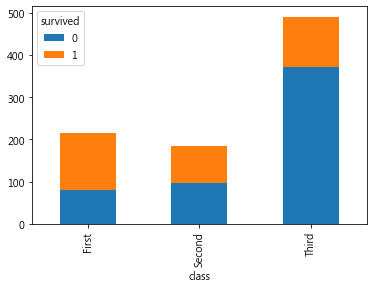

In [14]:
#不同艙等的存活率
titanic2_n.plot.bar(stacked=True)

<AxesSubplot:xlabel='sex'>

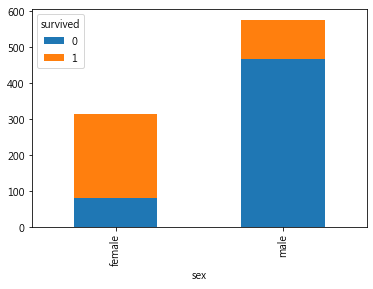

In [15]:
#不同性別的存活率
titanic2_sex=pd.crosstab(index=titanic2['sex'],columns=titanic2['survived'])
titanic2_sex
titanic2_sex.plot.bar(stacked=True)

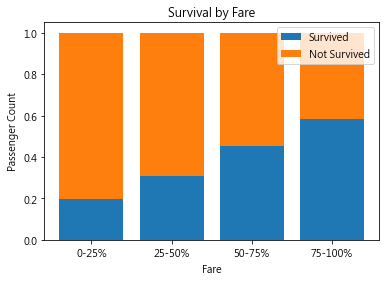

In [55]:
# 不同票價的存活率
fare_survival_rates = titanic2.groupby('fare')['survived'].mean()

# 將票價分成四個區間
per25 = np.percentile(titanic2['fare'], 25)
per50 = np.percentile(titanic2['fare'], 50)
per75 = np.percentile(titanic2['fare'], 75)

per75_data = titanic2[titanic2['fare'] >= per75]
per50_data = titanic[(titanic2['fare'] < per75) & (titanic2['fare'] > per50)]
per25_data = titanic[(titanic2['fare'] < per50) & (titanic2['fare'] >= per25)]
per0_data = titanic[titanic2['fare'] < per25]

# 計算四個票價區間的存活率
p0 = per0_data['survived'].mean()
p25 = per25_data['survived'].mean()
p50 = per50_data['survived'].mean()
p75 = per75_data['survived'].mean()

# 建立存活率和票價的二維列表
fare_survival_rates = [[p0, p25, p50, p75], [1-p0, 1-p25, 1-p50, 1-p75]]

# 繪製堆疊直條圖
labels = ['0-25%', '25-50%', '50-75%', '75-100%']
plt.bar(labels, fare_survival_rates[0], label='Survived')
plt.bar(labels, fare_survival_rates[1], bottom=fare_survival_rates[0], label='Not Survived')
plt.xlabel('Fare')
plt.ylabel('Passenger Count')
plt.title('Survival by Fare')
plt.legend()
plt.show()


<h1>由上述統計圖表可知，在頭等艙、性別女、票價區間在75%-100%之間的人存活率較高，可以推測存活者的身分若為貴婦則有較高生還可能。